# Introduction
In this notebook, we will apply oversampling technique and use the classification strategies we used in the notebook *Classification on imbalanced dataset.ipynb*

### Imports

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Sometimes sklearn gives ConvergenceWarnings. So we ignore those.
from warnings import filterwarnings
filterwarnings('ignore')

### Preparing and oversampling features

In [57]:
# Reading the dataset.
df = pd.read_csv('LSD_data.csv', sep=',')

# Getting features and labels.
X = df[['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'dominant_land_cover']].values
y = df['lumpy'].values

# Splitting into train-test in the ratio of 80-20.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f"Before oversampling, X_train: {x_train.shape}")
print(f"Before oversampling, y_train: {y_train.shape}")

# Oversampling data
oversampler = SMOTE(sampling_strategy="minority")
x_train, y_train = oversampler.fit_resample(x_train, y_train)

print(f"After oversampling, X_train: {x_train.shape}")
print(f"After oversampling, y_train: {y_train.shape}")

# Scaling the features.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f'x_train shape = {x_train.shape} | y_train shape = {y_train.shape}')
print(f'x_test shape  = {x_test.shape}  | y_test shape = {y_test.shape}')

Before oversampling, X_train: (19842, 14)
Before oversampling, y_train: (19842,)
After oversampling, X_train: (34800, 14)
After oversampling, y_train: (34800,)
x_train shape = (34800, 14) | y_train shape = (34800,)
x_test shape  = (4961, 14)  | y_test shape = (4961,)


### Core classifiers

##### Logistic Regression

In [58]:
def log_reg_hyptune(x_train, y_train):
    params = {
        'penalty': ['l2'],
        'C': [1.0, 1.5, 2.5, 3.0, 5.0, 10.0],
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=LogisticRegression(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [59]:
log_reg_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'C': 1.0, 'penalty': 'l2'}
Best score = 0.8863505747126437
Mean train score = 0.8863194444444445
Mean val  score = 0.8863122605363984
Total training time = 0:00:02.256830


In [60]:
def train_evaluate_log_reg(x_train, y_train, x_test, y_test):
    log_reg = LogisticRegression(C=1.0, penalty='l2')
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4004
           1       0.87      0.54      0.67       957

    accuracy                           0.90      4961
   macro avg       0.89      0.76      0.80      4961
weighted avg       0.89      0.90      0.89      4961




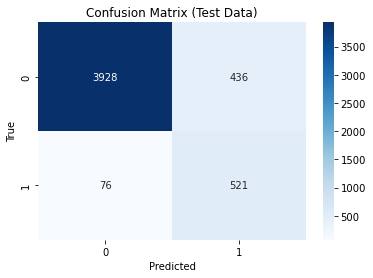

In [61]:
train_evaluate_log_reg(x_train, y_train, x_test, y_test)

##### SVM

In [62]:
def svm_hyptune(x_train, y_train):
    params = {
        'penalty': ['l2'],
        'C': [1.0, 1.5, 2.5, 3.0, 5.0]
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=LinearSVC(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [63]:
svm_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'C': 3.0, 'penalty': 'l2'}
Best score = 0.8851724137931034
Mean train score = 0.8844382183908046
Mean val  score = 0.8842241379310346
Total training time = 0:00:32.885269


In [64]:
def train_evaluate_svm(x_train, y_train, x_test, y_test):
    svm = LinearSVC(C=3.0, penalty='l2')
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3962
           1       0.87      0.52      0.65       999

    accuracy                           0.89      4961
   macro avg       0.88      0.75      0.79      4961
weighted avg       0.89      0.89      0.88      4961




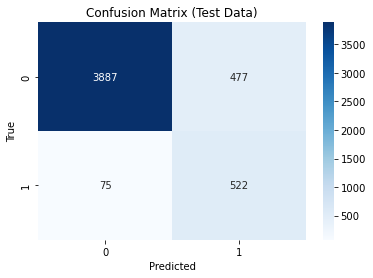

In [65]:
train_evaluate_svm(x_train, y_train, x_test, y_test)

##### Decision Tree

In [66]:
def dt_hyptune(x_train, y_train):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [100, 150, 200],

    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=DecisionTreeClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [67]:
dt_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'criterion': 'entropy', 'max_depth': 100}
Best score = 0.9785057471264368
Mean train score = 1.0
Mean val  score = 0.9771503831417624
Total training time = 0:00:04.496617


In [68]:
def train_evaluate_dt(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=100)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4310
           1       0.92      0.84      0.88       651

    accuracy                           0.97      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961




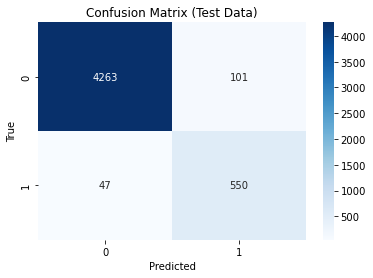

In [69]:
train_evaluate_dt(x_train, y_train, x_test, y_test)

##### Random Forest

In [70]:
def rf_hyptune(x_train, y_train):
    params = {
        'n_estimators': [10, 20, 30],
        'criterion': ['gini', 'entropy'],
        'max_depth': [50, 100],
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=RandomForestClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [71]:
rf_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 30}
Best score = 0.9795114942528735
Mean train score = 0.999254070881226
Mean val  score = 0.978043582375479
Total training time = 0:00:31.880639


In [72]:
def train_evaluate_rf(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=30)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4324
           1       0.90      0.85      0.87       637

    accuracy                           0.97      4961
   macro avg       0.94      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961




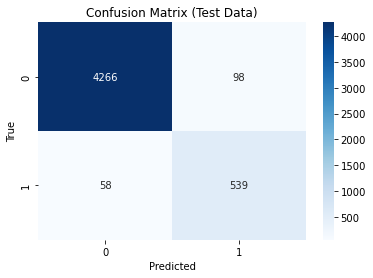

In [73]:
train_evaluate_rf(x_train, y_train, x_test, y_test)

#### SGD

In [74]:
def sgd_hyptune(x_train, y_train):
    params = {
        'penalty': ['l1', 'l2'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'optimal', 'invscaling'],
        'max_iter': [1000, 2000, 3000]
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=SGDClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.nanmean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.nanmean(clf.cv_results_['mean_test_score'], axis=0)
    
    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [75]:
sgd_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l1'}
Best score = 0.8926149425287356
Mean train score = 0.888176883780332
Mean val  score = 0.8879214559386973
Total training time = 0:00:03.177487


In [76]:
def train_evaluate_sgd(x_train, y_train, x_test, y_test):
    sgd = SGDClassifier(alpha=0.001, learning_rate='optimal', penalty='l1', max_iter=1000)
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3970
           1       0.89      0.53      0.67       991

    accuracy                           0.89      4961
   macro avg       0.89      0.76      0.80      4961
weighted avg       0.89      0.89      0.88      4961




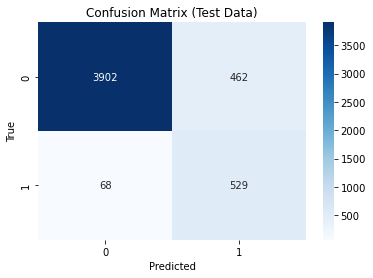

In [77]:
train_evaluate_sgd(x_train, y_train, x_test, y_test)

### Oversampled results summary of core classifiers
Here, recall & f1 are of label 1 only. Accuracy represents the overall models performance.

| Classifier                  	| Recall 	| F1   	| Accuracy 	|
|-----------------------------	|--------	|------	|----------	|
| Logistic Regression         	| 0.54   	| 0.67 	| 0.90     	|
| SVM                         	| 0.52   	| 0.65 	| 0.89     	|
| Decision Tree               	| 0.84   	| 0.88 	| 0.97     	|
| Random Forest               	| 0.85   	| 0.87 	| 0.97     	|
| Stochastic Gradient Descent 	| 0.53   	| 0.67 	| 0.89     	|

### Core ensemble methods

In [29]:
def generate_results(y_test, y_pred):
    """
    Generate Confusion Matrix and Classification Report for
    a given pair of y_pred and y_test values
    """
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    report = classification_report(y_pred, y_test)
    print(f"Classification Report: \n{report}\n")
    
    sn.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
    plt.title("Confustion Matrix (Test Data)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

##### Voting classifier

In [88]:
def train_evaluate_voting(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier(criterion="entropy", max_depth=50, n_estimators=30)
    lr_clf = LogisticRegression(C=1.0, penalty='l2')
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=100)
    
    ensemble = [
        ("rf", rf_clf),
        ("lr", lr_clf),
        ("dt", dt_clf)
    ]

    voting_clf = VotingClassifier(estimators=ensemble)
    voting_clf.fit(x_train, y_train)
    y_pred = voting_clf.predict(x_test)
    
    # Results
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4313
           1       0.92      0.85      0.88       648

    accuracy                           0.97      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961




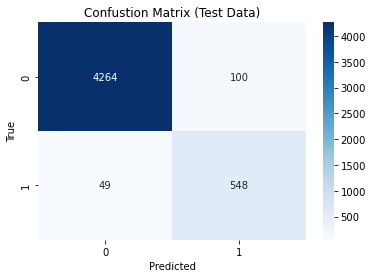

In [89]:
train_evaluate_voting(x_train, y_train, x_test, y_test)

##### Adaboost classifier

In [84]:
def train_evaluate_adaboost(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier(criterion="entropy", max_depth=50, n_estimators=30)
    adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf)
    
    adaboost_clf.fit(x_train, y_train)
    y_pred = adaboost_clf.predict(x_test)
        
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4331
           1       0.89      0.85      0.87       630

    accuracy                           0.97      4961
   macro avg       0.94      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961




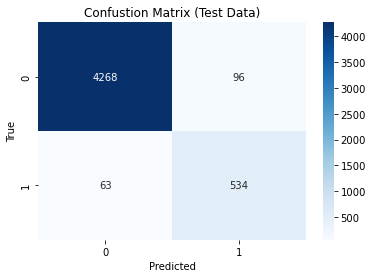

In [85]:
train_evaluate_adaboost(x_train, y_train, x_test, y_test)

##### Bagging classifier

In [86]:
def train_evaluate_bagging(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier(criterion="entropy", max_depth=50, n_estimators=30)
    bagging_clf = BaggingClassifier(base_estimator=rf_clf)
    
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4313
           1       0.92      0.84      0.88       648

    accuracy                           0.97      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961




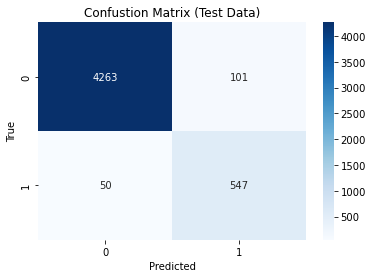

In [87]:
train_evaluate_bagging(x_train, y_train, x_test, y_test)

### Oversampled results summary of core ensemble methods
Here, recall & f1 are of label 1 only. Accuracy represents the overall models performance.

| Classifier          	| Recall 	| F1   	| Accuracy 	|
|---------------------	|--------	|------	|----------	|
| Voting Classifier   	| 0.85   	| 0.88 	| 0.97     	|
| Adaboost Classifier 	| 0.85   	| 0.87 	| 0.97     	|
| Bagging Classifier  	| 0.84   	| 0.88 	| 0.97    	|